### Importing all necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, MinMaxScaler, StandardScaler, RobustScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv(r'D:\Data Science\Dataset\KNN Income Dataset\adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.shape

(48842, 15)

In [5]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [6]:
df.columns.tolist()

['age',
 'workclass',
 'fnlwgt',
 'education',
 'educational-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

### Preprocessing 

#### Null Value Treatment

In [7]:
# In dataset we have ? 
# In missing vales i have added most repeated names

freq = df["workclass"].value_counts().idxmax()
df.loc[df["workclass"] == "?", "workclass"] =freq

freq = df["occupation"].value_counts().idxmax()
df.loc[df["occupation"] == "?", "occupation"] =freq

freq = df["native-country"].value_counts().idxmax()
df.loc[df["native-country"] == "?", "native-country"] =freq
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


### Explonatory Data Analysis

In [8]:
#Summary of categorical data

In [9]:
df.describe(include=['O'])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,36705,15784,22379,8981,19716,41762,32650,44689,37155


In [10]:
#Summary of Numerical data

In [11]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


#### Univariate Analysis:

##### Numerical Column Analysis

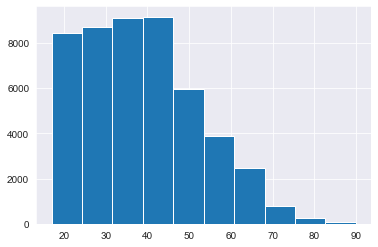

In [12]:
sns.set_style("dark")
df.age.hist()

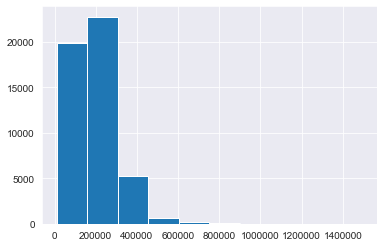

In [13]:
df.fnlwgt.hist()
plt.show()

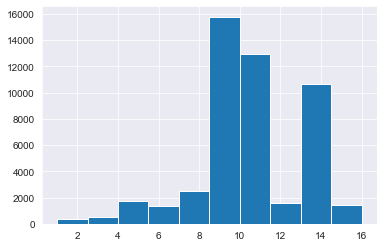

In [14]:
df['educational-num'].hist()
plt.show()

In [15]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


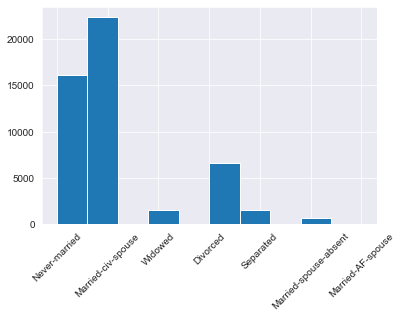

In [16]:
df['marital-status'].hist()
plt.xticks(rotation=45)
plt.show()

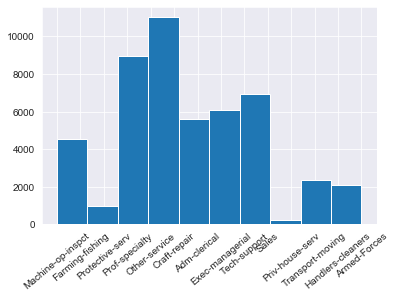

In [17]:
df.occupation.hist()
plt.xticks(rotation = 40)
plt.show()

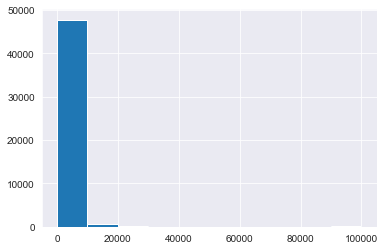

In [18]:
df['capital-gain'].hist()
plt.show()

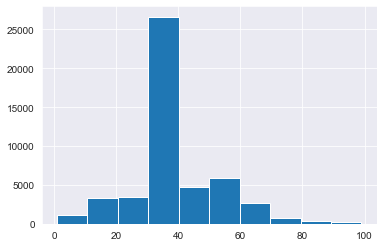

In [19]:
df["hours-per-week"].hist()
plt.show()

##### Categorical Data Analysis

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

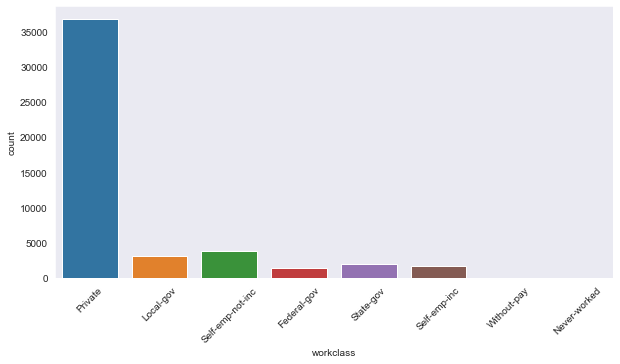

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(df['workclass'])
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

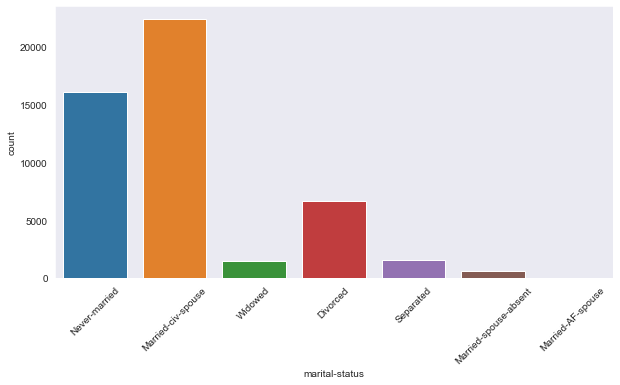

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(df['marital-status'])
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

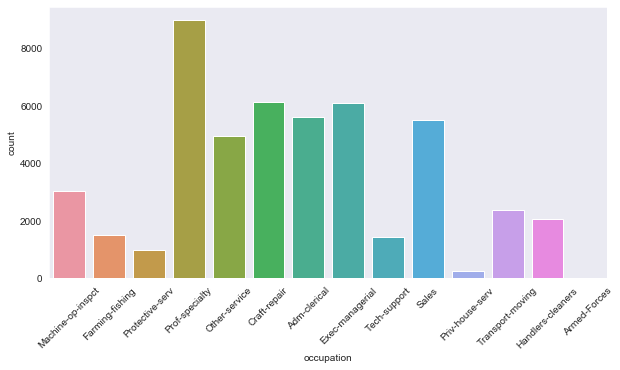

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(df['occupation'])
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

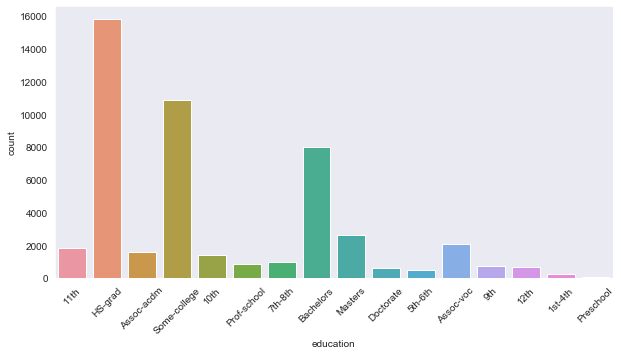

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(df['education'])
plt.xticks(rotation=45)

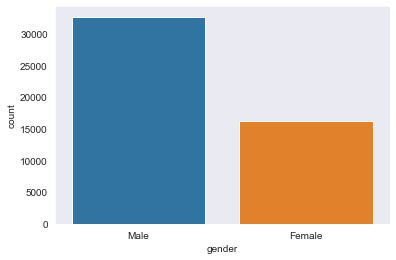

In [24]:
sns.countplot(df['gender'])

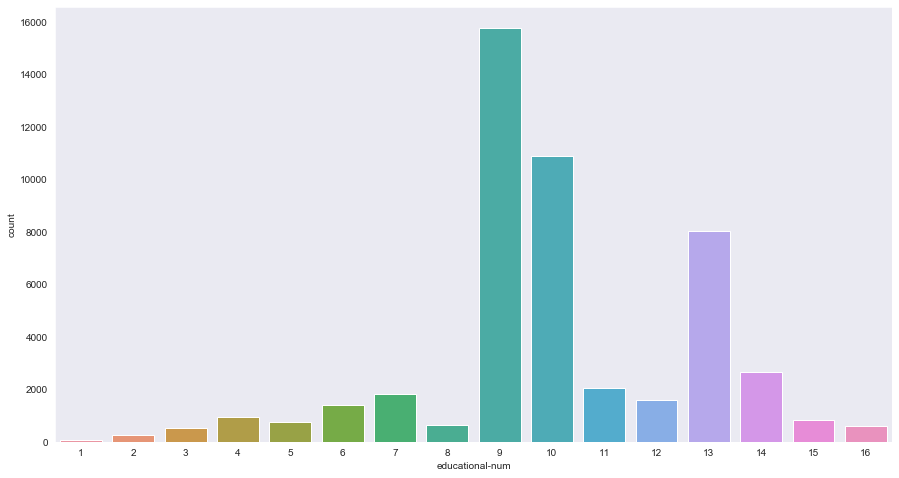

In [25]:
plt.figure(figsize=(15,8))
sns.countplot(x=df['educational-num'])

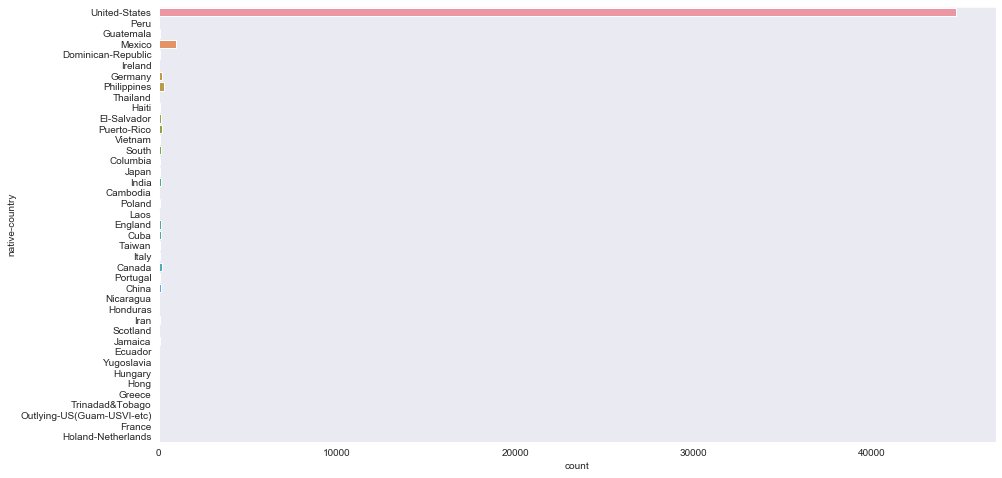

In [26]:
plt.figure(figsize=(15,8))
sns.countplot(y=df['native-country'])


#### Bivarient Analysis

In [27]:
df.head(1)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K


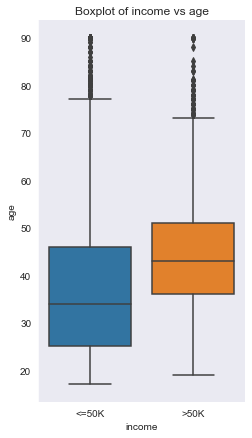

In [28]:
sns.catplot(x='income',y='age',data=df,height = 6, aspect=.6,kind ="box")
plt.title("Boxplot of income vs age")
plt.show()

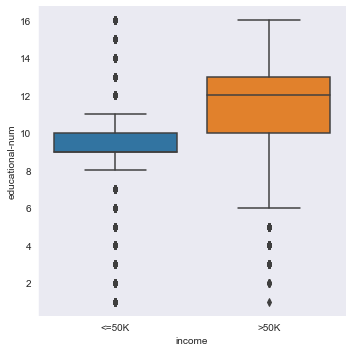

In [29]:
sns.catplot(x='income',y='educational-num',data=df,kind='box')

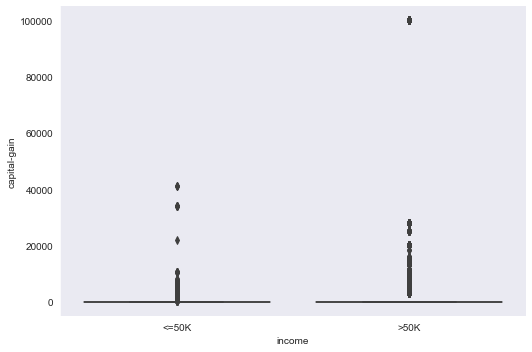

In [30]:
sns.catplot(x='income',y='capital-gain',data=df,aspect=1.5,kind='box')

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

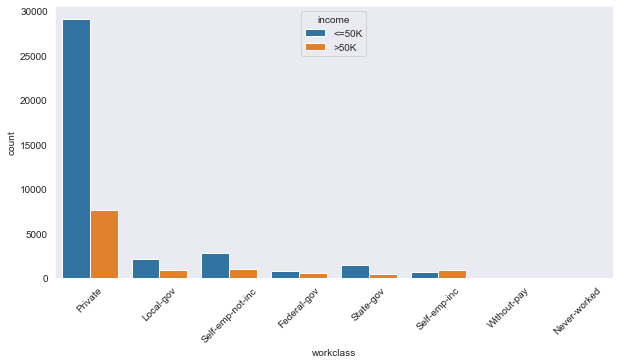

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(x='workclass',hue='income',data=df)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

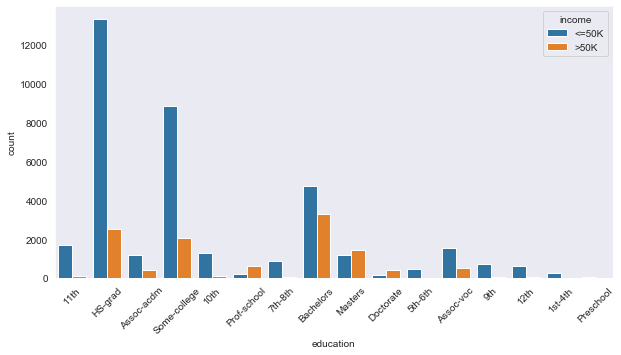

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x='education',hue='income',data=df)
plt.xticks(rotation=45)

#### Multivariant Analysis

<Figure size 720x360 with 0 Axes>

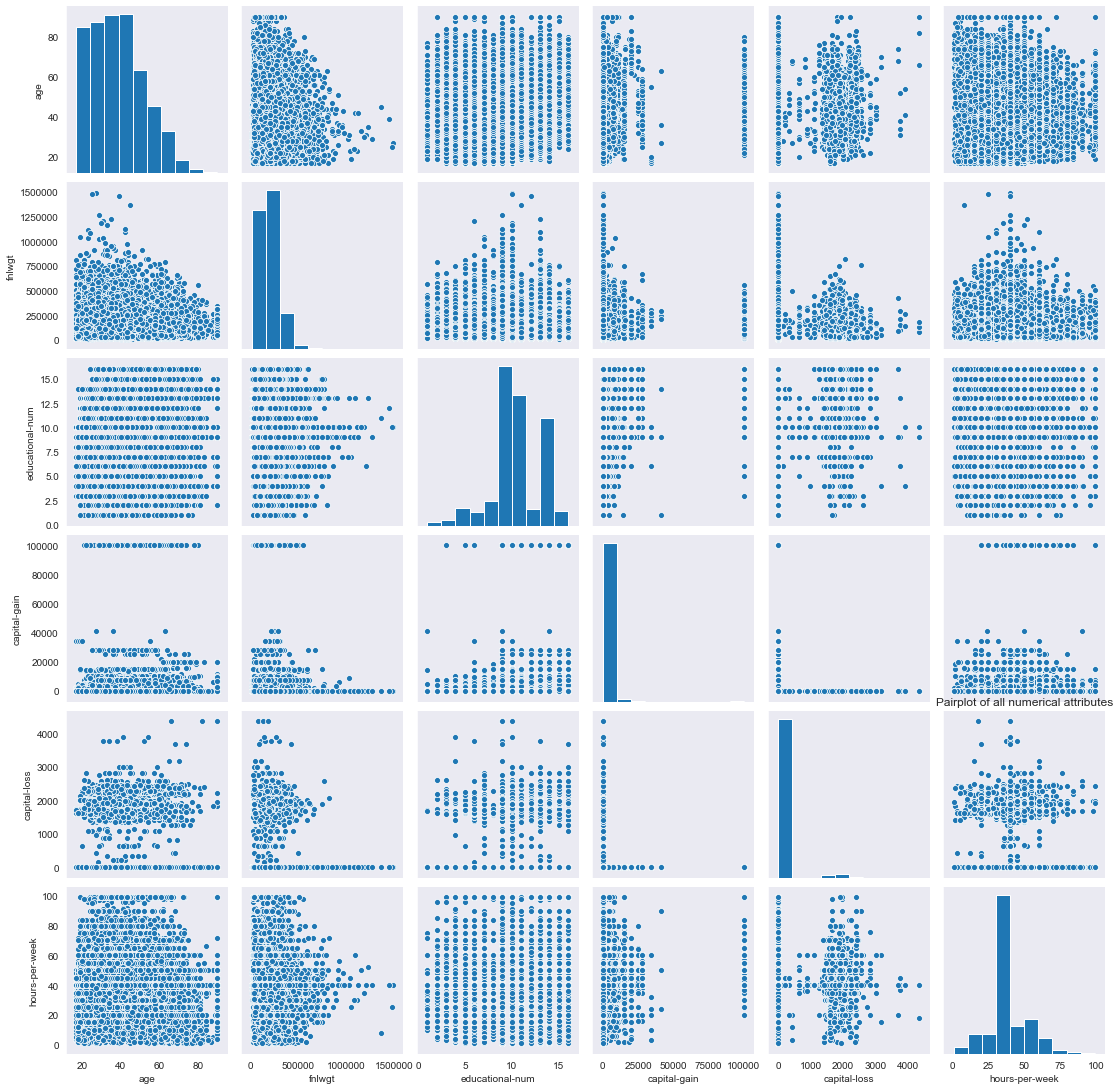

In [33]:
plt.figure(figsize=(10,5))
sns.pairplot(df)
plt.title("Pairplot of all numerical attributes")
plt.show()


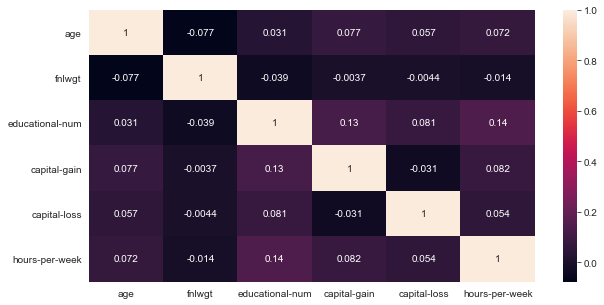

In [34]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot= True)

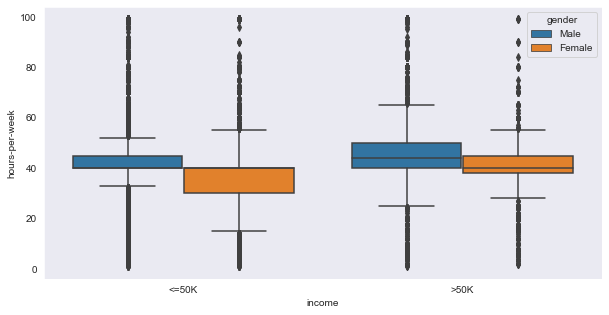

In [35]:
plt.figure(figsize=(10,5))
sns.boxplot(x='income',y='hours-per-week',hue='gender',data=df)

In [36]:
df['income'] = df['income'].map({'<=50K':0,'>50K':1 })

In [37]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
6,29,Private,227026,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,0
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,1
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,0
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,0


In [38]:
df.describe(include='all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842.000000
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,NaN
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,36705,NaN,15784,NaN,22379,8981,19716,41762,32650,NaN,NaN,NaN,44689,NaN
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,0.239282
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,0.426649
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,0.000000
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,0.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.6+ MB


### Data Cleaning

In [40]:
#educational-num,fnlwgt seems to be not so important
df=df.drop(["educational-num"],axis=1)
df=df.drop(["fnlwgt"],axis=1)

### Label Encoder

In [41]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [42]:
df[['age', 'workclass', 'education', 'marital-status', 'occupation','relationship', 'race', 'gender', 'capital-gain', 
    'capital-loss','hours-per-week', 'native-country']]=df[['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country']].apply(le.fit_transform)

In [43]:
X=df.drop(["income"],axis=1)
y=df["income"]

In [44]:
X.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,8,3,1,4,6,3,2,1,0,0,39,38
1,21,3,11,2,4,0,4,1,0,0,49,38
2,11,1,7,2,10,0,4,1,0,0,39,38
3,27,3,15,2,6,0,2,1,98,0,39,38
4,1,3,15,4,9,3,4,0,0,0,29,38


In [45]:
df['income'].value_counts()

0    37155
1    11687
Name: income, dtype: int64

### Data is imbalance Applying SMOTE

In [46]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [47]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X,y)

In [48]:
X_res.shape,y_res.shape

((72982, 12), (72982,))

### Split of Data 

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
scoring = 'accuracy'
models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('SGD', SGDClassifier()))
models.append(('RF', RandomForestClassifier(n_jobs=-1)))



#SVM CRASHES SYS
#models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=0)
  cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)


LR: 0.799401 (0.007339)
LDA: 0.800245 (0.006606)
KNN: 0.822051 (0.005944)
CART: 0.813503 (0.007294)
NB: 0.797712 (0.006314)
GB: 0.864049 (0.004387)
SGD: 0.752615 (0.054211)
RF: 0.849819 (0.003242)


### Applying GB Algorithm

In [51]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
predictions = gb.predict(X_test)
#print(accuracy_score(Y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[7120  359]
 [ 889 1401]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7479
           1       0.80      0.61      0.69      2290

    accuracy                           0.87      9769
   macro avg       0.84      0.78      0.81      9769
weighted avg       0.87      0.87      0.87      9769

